In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("bestsellers with categories.csv")

In [3]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Sort by year

In [4]:
sorted_data = data.sort_values(['Year'])

In [5]:
sorted_data.reset_index(drop=True)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"I, Alex Cross",James Patterson,4.6,1320,7,2009,Fiction
1,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,4.6,1365,11,2009,Non Fiction
2,The Last Lecture,Randy Pausch,4.7,4028,9,2009,Non Fiction
3,New Moon (The Twilight Saga),Stephenie Meyer,4.6,5680,10,2009,Fiction
4,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
...,...,...,...,...,...,...,...
545,Guts,Raina Telgemeier,4.8,5476,7,2019,Non Fiction
546,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.6,26490,15,2019,Non Fiction
547,The Silent Patient,Alex Michaelides,4.5,27536,14,2019,Fiction
548,"Girl, Wash Your Face: Stop Believing the Lies ...",Rachel Hollis,4.6,22288,12,2019,Non Fiction


### Categorize into Fiction and Non-Fiction

In [33]:
fiction_books = sorted_data[sorted_data["Genre"]== "Fiction"]

In [34]:
fiction_books.reset_index(drop=True)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"I, Alex Cross",James Patterson,4.6,1320,7,2009,Fiction
1,New Moon (The Twilight Saga),Stephenie Meyer,4.6,5680,10,2009,Fiction
2,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
3,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
4,Watchmen,Alan Moore,4.8,3829,42,2009,Fiction
...,...,...,...,...,...,...,...
235,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,8842,10,2019,Fiction
236,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction
237,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2019,Fiction
238,Goodnight Moon,Margaret Wise Brown,4.8,8837,5,2019,Fiction


In [8]:
non_fiction_books = sorted_data[sorted_data["Genre"] == "Non Fiction"].reset_index(drop=True)

### Non Fiction Books

In [12]:
non_fiction_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,4.6,1365,11,2009,Non Fiction
1,The Last Lecture,Randy Pausch,4.7,4028,9,2009,Non Fiction
2,Outliers: The Story of Success,Malcolm Gladwell,4.6,10426,20,2009,Non Fiction
3,"Super Freakonomics: Global Cooling, Patriotic ...",Steven D. Levitt,4.5,1583,18,2009,Non Fiction
4,Three Cups of Tea: One Man's Mission to Promot...,Greg Mortenson,4.3,3319,11,2009,Non Fiction


In [47]:
books_count = pd.DataFrame(index = fiction_books["Year"].unique())
books_count["Books per Year Fiction"] = fiction_books[["Name","Year"]].groupby(by=["Year"]).count()
books_count["Books per Year Non-Fiction"] = non_fiction_books[["Name", "Year"]].groupby(by=["Year"]).count()

In [48]:
books_count

,Books per Year Fiction,Books per Year Non-Fiction
2009,24,26
2010,20,30
2011,21,29
2012,21,29
2013,24,26
2014,29,21
2015,17,33
2016,19,31
2017,24,26
2018,21,29


In [61]:
import plotly.graph_objects as go
# import plotly.express as px

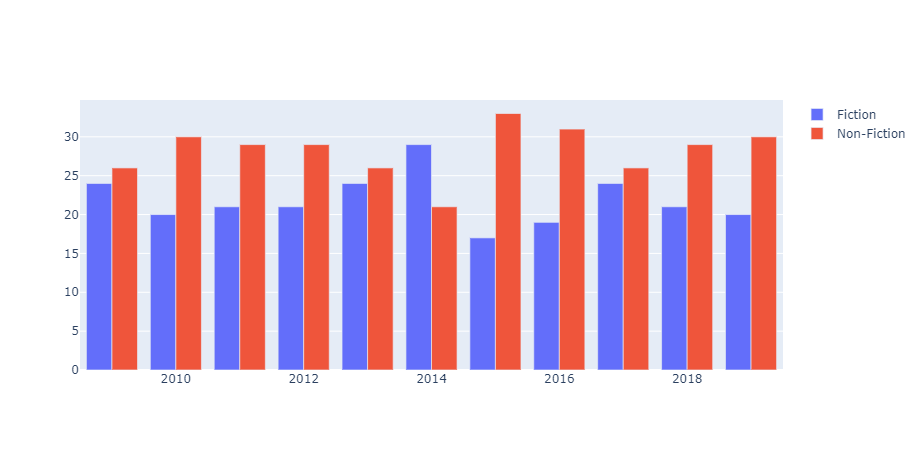

In [62]:
plot = go.Figure(data=[go.Bar( 
    name = 'Fiction', 
    x = books_count.index, y = books_count['Books per Year Fiction']
   ), 
                       go.Bar( 
    name = 'Non-Fiction', 
    x = books_count.index, y = books_count['Books per Year Non-Fiction']
   ) 
]) 
                   
plot.show()

# fig = px.bar(x = books_count.index, y = books_count['Books per Year Fiction'])
# fig = px.bar(x = books_count.index, y = books_count['Books per Year Non-Fiction'])


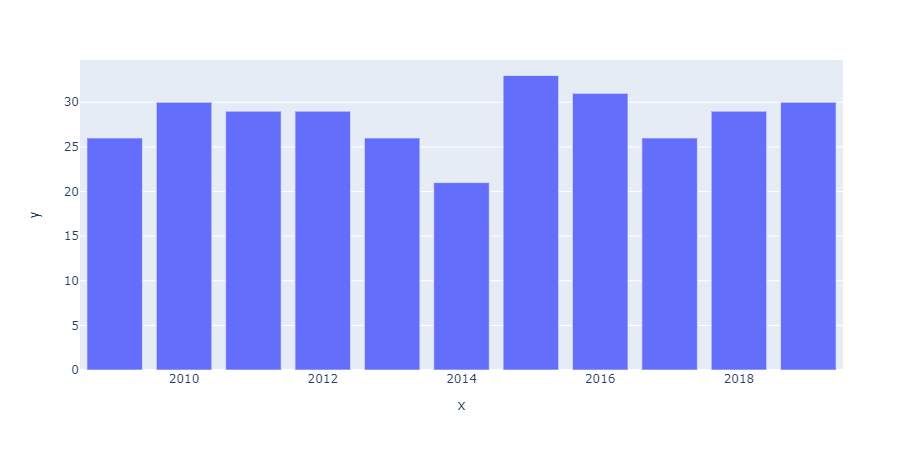

In [55]:
fig.show()